# Predicting House Prices with Regression using TensorFlow

---

We will build a neural network model to solve a regression problem of predicting house prices where the historical values with certain features are known . We will accomplish this with the help of following tasks in the project:

- Understand the problem statement
- Understand the dataset
- Data normalization
- Train and Test split
- Create a neural network model
- Train the model to fit the dataset
- Evaluate the model
- Visualize the predictions

<!-- !
**Project Structure**


The hands on project on Predicting House Prices is divided into following tasks:

1. Task 1: Introduction
    - Introduction to the house pricing problem.
    - Importing libraries and helper functions.
2. Task 2: The Dataset
    - Importing the dataset.
    - A quick look at a few examples.
    - Check missing data.
3. Task 3: Data Normalization
    - Data normalization.
    - Convert label values back to prices.
4. Task 4: Training and Test Sets
    - Select features.
    - Select labels.
    - Convert from Pandas data structures to numpy arrays.
    - Train and test split.
5. Task 5: Creating the Model
    - Creating a sequential model with Keras.
    - Model architecture - hidden layers and hidden units.
    - Compiling the model by specifying an optimizer and a loss function.
    - Computing trainable parameters.
6. Task 6: Model Training
    - Training the model to fit to training data.
    - Plotting training and validation loss.
7. Task 7: Predictions
    - Plot and compare raw predictions.
    - Plot and compare price predictions. -->

# Task 1: Introduction

For this project, we are going to work on evaluating price of houses given the following features:

1. Year of sale of the house
2. The age of the house at the time of sale
3. Distance from city center
4. Number of stores in the locality
5. The latitude
6. The longitude

<!-- ![Regression](images/regression.png) -->

Note: This notebook uses `python 3` and these packages: `tensorflow`, `pandas`, `matplotlib`, `scikit-learn`.

## 1.1: Importing Libraries & Helper Functions

First of all, we will need to import some libraries and helper functions. This includes TensorFlow and some utility functions.

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
#!conda install -c anaconda tensorflow -y
import tensorflow as tf

# !pip install utils 
# from utils import *
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback

%matplotlib inline
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

print('Libraries imported.')

Libraries imported.


# Task 2: Importing the Data

## 2.1: Importing the Data

The dataset is saved in a `data.csv` file. We will use `pandas` to take a look at some of the rows.

In [9]:
#date- the year the house is sold
#age - the house age
#distance- from city center
#stores- nearby stores
column_names=['serial', 'date', 'age', 'distance', 'stores', 'latitude', 'longitude', 'price']
df = pd.read_csv('data.csv', names = column_names) 
df.head()

,serial,date,age,distance,stores,latitude,longitude,price
0,0,2009,21,9,6,84,121,14264
1,1,2007,4,2,3,86,121,12032
2,2,2016,18,3,7,90,120,13560
3,3,2002,13,2,2,80,128,12029
4,4,2014,25,5,8,81,122,14157


## 2.2: Check Missing Data

It's a good practice to check if the data has any missing values. In real world data, this is quite common and must be taken care of before any data pre-processing or model training.

In [10]:
#isna() returns true or false for each rows and columns and sum functions 
#will sum up all the missing values for particular column
df.isna().sum()

serial       0
date         0
age          0
distance     0
stores       0
latitude     0
longitude    0
price        0
dtype: int64

# Task 3: Data Normalization

## 3.1: Data Normalization

We can make it easier for optimization algorithms to find minimas by normalizing the data before training a model. Normalization will bring different columns in similar ranges.

In [11]:
#iloc first arg is rows and second arg is columns. 
#we dont need serial so we will ignore the first column by iloc
df = df.iloc[:,1:]
#mean  and std will give column wise mean and satndard deviation
df_norm = (df - df.mean()) / df.std()
df_norm.head()

,date,age,distance,stores,latitude,longitude,price
0,0.015978,0.181384,1.257002,0.345224,-0.307212,-1.260799,0.350088
1,-0.350485,-1.319118,-0.930610,-0.609312,0.325301,-1.260799,-1.836486
2,1.298598,-0.083410,-0.618094,0.663402,1.590328,-1.576456,-0.339584
3,-1.266643,-0.524735,-0.930610,-0.927491,-1.572238,0.948803,-1.839425
4,0.932135,0.534444,0.006938,0.981581,-1.255981,-0.945141,0.245266


## 3.2: Convert Label Value

Because we are using normalized values for the labels, we will get the predictions back from a trained model in the same distribution. So, we need to convert the predicted values back to the original distribution if we want predicted prices.

In [12]:
y_mean = df['price'].mean()
y_std = df['price'].std()

def convert_label_value(pred):
    return int(pred * y_std + y_mean)
#check the first price
print(convert_label_value(0.350088), df['price'][0])

14263 14264


The prices are almost the same as we are using int in the function that we have made

# Task 4: Create Training and Test Sets

## 4.1: Select Features

Make sure to remove the column __price__ from the list of features as it is the label and should not be used as a feature.

In [13]:
#selcting first 6 columns excluding the price column
X = df_norm.iloc[:, :6]
X.head()

,date,age,distance,stores,latitude,longitude
0,0.015978,0.181384,1.257002,0.345224,-0.307212,-1.260799
1,-0.350485,-1.319118,-0.930610,-0.609312,0.325301,-1.260799
2,1.298598,-0.083410,-0.618094,0.663402,1.590328,-1.576456
3,-1.266643,-0.524735,-0.930610,-0.927491,-1.572238,0.948803
4,0.932135,0.534444,0.006938,0.981581,-1.255981,-0.945141


## 4.2: Select Labels

In [14]:
#select only price column
Y = df_norm.iloc[:, -1]
Y.head()

0    0.350088
1   -1.836486
2   -0.339584
3   -1.839425
4    0.245266
Name: price, dtype: float64

## 4.3: Feature and Label Values

We will need to extract just the numeric values for the features and labels as the TensorFlow model will expect just numeric values as input.

In [15]:
#get the array/list
X_arr = X.values
Y_arr = Y.values

print('X_arr shape: ', X_arr.shape)
print('Y_arr shape: ', Y_arr.shape)

X_arr shape:  (5000, 6)
Y_arr shape:  (5000,)


## 4.4: Train and Test Split

We will keep some part of the data aside as a __test__ set. The model will not use this set during training and it will be used only for checking the performance of the model in trained and un-trained states. This way, we can make sure that we are going in the right direction with our model training.

We will use a helper function test_train_split from `scikit-learn` with test size 0.05%

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_arr, Y_arr, 
                                                    test_size = 0.05, 
                                                    random_state=0)

print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (4750, 6)
y_train shape:  (4750,)
X_test shape:  (250, 6)
y_test shape:  (250,)


# Task 5: Create the Model

## 5.1: Create the Model

Let's write a function that returns an untrained model of a certain architecture. We will use Sequential class from `keras` with 3 hidden layers. The dense layer has 10 nodes and input shape 6 as we have 6 features. The output layer doesnt need any activation as it is a regression problem and we want linear o/p.

In [20]:
def get_model():
    
    model = Sequential([
        Dense(10, input_shape = (6,), activation = 'relu'),
        Dense(20, activation = 'relu'),
        Dense(5, activation = 'relu'),
        Dense(1)
    ])
#before using a we need to compile it
#optimizer will try to minimize the loss func.
    model.compile(
        loss='mse',
        optimizer='adam'
    )
    
    return model

model = get_model()
#Lets take a look at the model architecture
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                70        
_________________________________________________________________
dense_9 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 105       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 6         
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


Eaxmple: Parameter count for dense_2= (5*20)+5=105

# Task 6: Model Training

## 6.1: Model Training

We can use an `EarlyStopping` callback from `Keras` to stop the model training if the validation loss stops decreasing for a few epochs. 

In [21]:
#wait for 5 epochs to see if val-los decreases
early_stopping = EarlyStopping(monitor='val_loss', patience = 5)

model = get_model()

preds_on_untrained = model.predict(X_test)

history = model.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    epochs = 1000,
    callbacks = [early_stopping]
)

Train on 4750 samples, validate on 250 samples
Epoch 1/1000
4750/4750 [==============================] - 1s 294us/sample - loss: 0.8962 - val_loss: 0.4844
Epoch 2/1000
4750/4750 [==============================] - 1s 171us/sample - loss: 0.4051 - val_loss: 0.2077
Epoch 3/1000
4750/4750 [==============================] - 1s 137us/sample - loss: 0.2060 - val_loss: 0.1613
Epoch 4/1000
4750/4750 [==============================] - 1s 136us/sample - loss: 0.1771 - val_loss: 0.1514
Epoch 5/1000
4750/4750 [==============================] - 1s 127us/sample - loss: 0.1694 - val_loss: 0.1443
Epoch 6/1000
4750/4750 [==============================] - 1s 118us/sample - loss: 0.1658 - val_loss: 0.1467
Epoch 7/1000
4750/4750 [==============================] - 1s 172us/sample - loss: 0.1628 - val_loss: 0.1408
Epoch 8/1000
4750/4750 [==============================] - 1s 141us/sample - loss: 0.1615 - val_loss: 0.1433
Epoch 9/1000
4750/4750 [==============================] - 1s 148us/sample - loss: 0.1600 

Although there were 1000 epochs, the model did not see any improvement for 5 epochs and hence it stopped at 12 epoch.

## 6.2: Visualization Functions

Let's define some functions to visualize the model.

In [29]:
def plot_loss(history):
    h = history.history
    x_lim = len(h['loss'])
    plt.figure(figsize=(8, 8))
    plt.plot(range(x_lim), h['val_loss'], label = 'Validation Loss')
    plt.plot(range(x_lim), h['loss'], label = 'Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    return

def plot_predictions(preds, y_test):
    plt.figure(figsize=(8, 8))
    plt.plot(preds, y_test, 'ro')
    plt.xlabel('Preds')
    plt.ylabel('Labels')
    plt.xlim([-0.5, 0.5])
    plt.ylim([-0.5, 0.5])
    plt.plot([-0.5, 0.5], [-0.5, 0.5], 'b--')
    plt.show()
    return

def compare_predictions(preds1, preds2, y_test):
    plt.figure(figsize=(8, 8))
    plt.plot(preds1, y_test, 'ro', label='Untrained Model')
    plt.plot(preds2, y_test, 'go', label='Trained Model')
    plt.xlabel('Preds')
    plt.ylabel('Labels')
    
    y_min = min(min(y_test), min(preds1), min(preds2))
    y_max = max(max(y_test), max(preds1), max(preds2))
    
    plt.xlim([y_min, y_max])
    plt.ylim([y_min, y_max])
    plt.plot([y_min, y_max], [y_min, y_max], 'b--')
    plt.legend()
    plt.show()
    return

## 6.3: Plot Training and Validation Loss

Let's use the `plot_loss` helper function to take a look training and validation loss.

dict_keys(['loss', 'val_loss'])


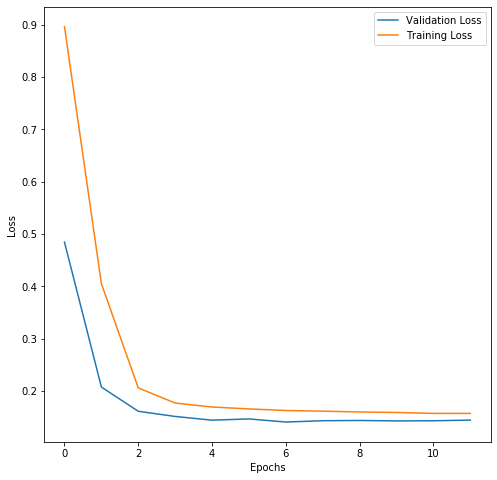

In [30]:
# list all data in history
print(history.history.keys())
# summarize history for loss
plot_loss(history)

# Task 7: Predictions

## 7.1: Plot Raw Predictions

Let's use the `compare_predictions` helper function to compare predictions from the model when it was untrained and when it was trained.

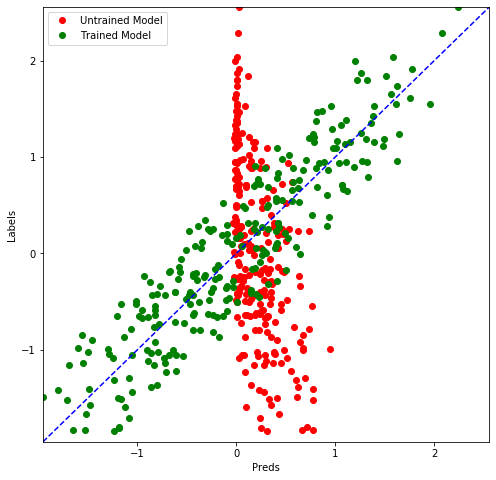

In [31]:
preds_on_trained = model.predict(X_test)

compare_predictions(preds_on_untrained, preds_on_trained, y_test)

As you can see the untrained model is random and trained model is linear.

## 7.2: Plot Price Predictions

The plot for price predictions and raw predictions will look the same with just one difference: The x and y axis scale is changed.

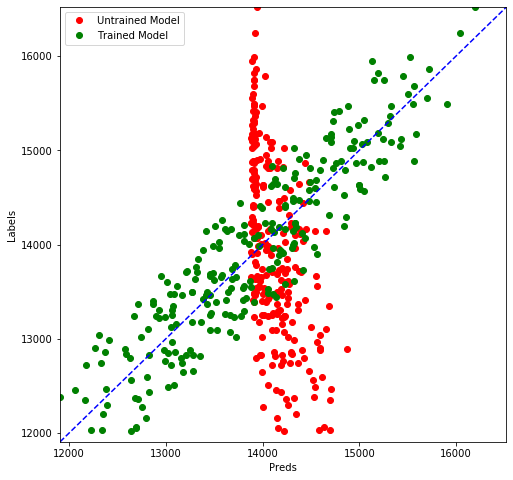

In [32]:
price_on_untrained = [convert_label_value(y) for y in preds_on_untrained]
price_on_trained = [convert_label_value(y) for y in preds_on_trained]
price_y_test = [convert_label_value(y) for y in y_test]

compare_predictions(price_on_untrained, price_on_trained, price_y_test)

---

The tutorial of the project can be found [here](https://www.coursera.org/projects/tensorflow-beginner-predicting-house-prices-regression)